# Non-Seperable Classification Using MLP: Pattern Recognition in Process Control Charts

### IE 7860

Priyanka Patil

## Introduction

Evaluate the performance of MLP networks on the problem of problem of pattern recognition in process “location” control charts.
In particular, the neural network is expected to automate the implementation of the runs rules for control charts based on X-Chart (that plots individual observations across time). 
A process is declared to be out of statistical control when:
1.	A point falls beyond the control limits, usually set at ± three standard deviations 
2.	Two out of three consecutive points fall beyond the same ± two standard deviation band 
3.	Four out of five consecutive points fall beyond the same ± one standard deviation band
4.	A run of seven consecutive points falls: 
a. Above the center line
b. Below the center line 
5.	A run of seven consecutive points falls: 
a. In a continuous upward pattern
b. In a continuous downward pattern
6.	Nine out of ten points fall within the ± one standard deviation band

Evaluation criteria would include the generalization capability of the neural network and the rationale behind the construction of an "optimal" neural network. 
Number of inputs per pattern is 10 (to accommodate runs rule #6) and number of outputs per pattern is 7 (to accommodate a process in control (first output) and each of the 6 runs rules violations). 

## Dataset

Training data set is made up of 2500 patterns (1000 patterns representing a process in control and 250 patterns representing each of the six rule violations) and the file is labeled “SPC-Training.dat” 
Testing data set is made up of 250 patterns (100 patterns representing a process in control and 25 patterns representing each of the six rule violations) and the file is labeled “SPC-Testing.dat” .

## **Methodology**

Methodology that we'll follow is as below using MLP:

1. Data Reviewing
2. Data Preprocessing
3. Build a baseline model and optimize parameters
4. Build and Train Model using and optimized parameters
5. Model Evaluation is done by checking accuracy
6. Conclusion


## **Load, Review and Pre-process data**

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam

In [2]:
# Load data
df_train = pd.read_csv("SPC-Training.csv", delimiter=',',header=None)
df_test = pd.read_csv("SPC-Testing.csv",delimiter=',', header=None)
print('Train data:')
display(df_train.head())
print()
print('Test data:')
display(df_test.head())

Train data:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-1.691,-2.426,1.440,-2.688,2.240,-2.577,1.541,-0.045,-1.093,-0.498,1,0,0,0,0,0,0
1,1.337,-0.014,-1.134,1.714,1.821,-1.989,-1.056,-1.823,2.408,0.906,1,0,0,0,0,0,0
2,-0.278,0.169,-2.756,-0.819,2.074,2.179,-0.616,1.405,-2.847,0.325,1,0,0,0,0,0,0
3,1.156,1.827,1.084,-0.675,-2.409,2.970,1.037,-1.972,-0.191,1.514,1,0,0,0,0,0,0
4,-2.849,-2.715,0.909,-0.211,2.050,-2.632,1.746,-0.534,1.426,-1.512,1,0,0,0,0,0,0



Test data:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-1.691,-2.426,1.440,-2.688,2.240,-2.577,1.541,-0.045,-1.093,-0.498,1,0,0,0,0,0,0
1,1.337,-0.014,-1.134,1.714,1.821,-1.989,-1.056,-1.823,2.408,0.906,1,0,0,0,0,0,0
2,-0.278,0.169,-2.756,-0.819,2.074,2.179,-0.616,1.405,-2.847,0.325,1,0,0,0,0,0,0
3,1.156,1.827,1.084,-0.675,-2.409,2.970,1.037,-1.972,-0.191,1.514,1,0,0,0,0,0,0
4,-2.849,-2.715,0.909,-0.211,2.050,-2.632,1.746,-0.534,1.426,-1.512,1,0,0,0,0,0,0


In [3]:
# Separate input features from output data
X_train_df = df_train.iloc[:, :10]
y_train_df = df_train.iloc[:, 10:]
X_test_df = df_test.iloc[:, :10]
y_test_df = df_test.iloc[:, 10:]

Box Plot of training data: 


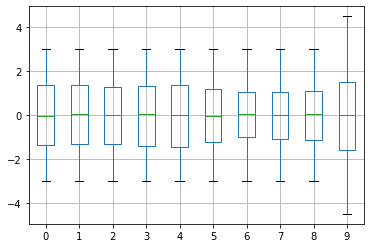


Density Plot of overall training data:


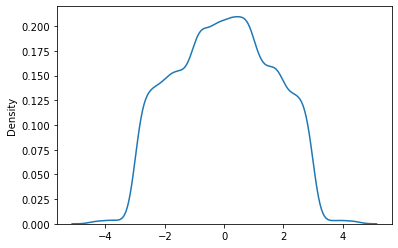

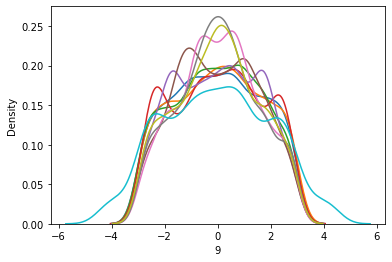

Box Plot of testing data: 


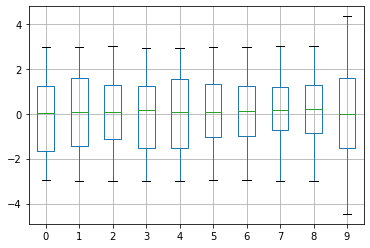


Density Plot of overall testing data:


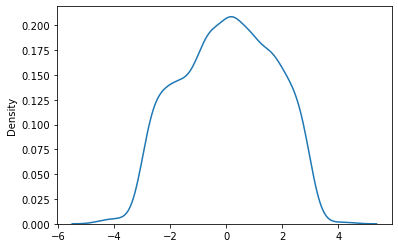

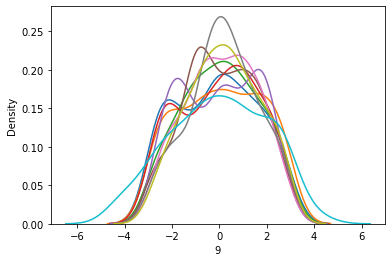

In [4]:
# Check whether data needs normalization
## Checking training data
### Box plot
print('Box Plot of training data: ')
X_train_df.boxplot()
plt.show()
print()

### Density plot
print('Density Plot of overall training data:')
sns.distplot(X_train_df, hist=False)
plt.show()


### Density plot of each feature in training data
for i in X_train_df:
    sns.distplot(X_train_df[i], hist = False, label = i)
plt.show()

## Checking testing data
### Box plot
print('Box Plot of testing data: ')
X_test_df.boxplot()
plt.show()
print()

### Density plot
print('Density Plot of overall testing data:')
sns.distplot(X_test_df, hist=False)
plt.show()

### Density plot of each feature in testing data
for i in X_test_df:
    sns.distplot(X_test_df[i], hist = False, label = i)
plt.show()

### Data Normalization

In [20]:
# Data Normalization
## Normalize training data
normalized_X_train_df=(X_train_df-X_train_df.mean())/X_train_df.std()

## Normalize testing data
normalized_X_test_df=(X_test_df-X_test_df.mean())/X_test_df.std()


Box Plot of training data: 


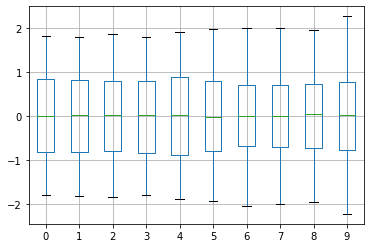


Density Plot of overall training data:


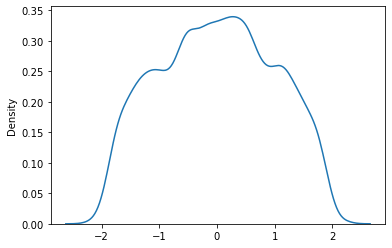

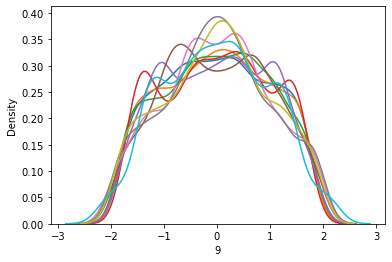

Box Plot of testing data: 


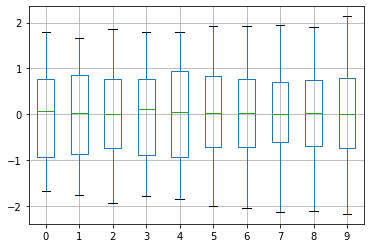


Density Plot of overall testing data:


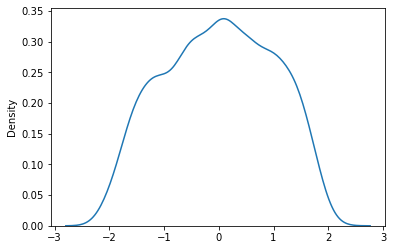

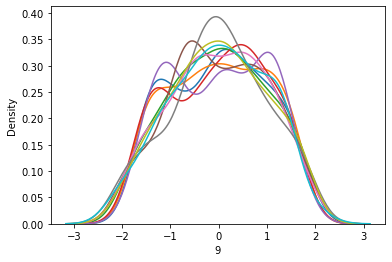

In [6]:
# Check normalized data
## Checking training data
### Box plot
print('Box Plot of training data: ')
normalized_X_train_df.boxplot()
plt.show()
print()

### Density plot
print('Density Plot of overall training data:')
sns.distplot(normalized_X_train_df, hist=False)
plt.show()


### Density plot of each feature in training data
for i in normalized_X_train_df:
    sns.distplot(normalized_X_train_df[i], hist = False, label = i)
plt.show()

## Checking testing data
### Box plot
print('Box Plot of testing data: ')
normalized_X_test_df.boxplot()
plt.show()
print()

### Density plot
print('Density Plot of overall testing data:')
sns.distplot(normalized_X_test_df, hist=False)
plt.show()

### Density plot of each feature in testing data
for i in normalized_X_test_df:
    sns.distplot(normalized_X_test_df[i], hist = False, label = i)
plt.show()

Since, we have data normalized, it can be converted to arrays to use futher for training and testing purposes.

In [7]:
# Convert dataframes into numpy array
X_train = X_train_df.values
y_train = y_train_df.values
X_test = X_test_df.values
y_test = y_test_df.values 

## **Build Model**


### **Build Model and Tune Hyper-Parameters**

In [ ]:
#clf = KerasClassifier(make_model)
#cv = StratifiedShuffleSplit(n_splits = 14, test_size=0.6, random_state = 1)
#param_grid = {'epochs' : [50,100,200,300], 'hidden_size':  [10, 20, 64], 'optimizer':['Adam','SGD']}
#grid = GridSearchCV(clf, param_grid = param_grid, cv = cv)
#grid.fit(X_train, y_train)
#print(grid.best_params_)

### **Train Model - using the optimized parameters**

In [16]:
# Training the model using best parameters
# get the model
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam

def get_model(n_inputs, n_outputs):
    model = Sequential()
    model.add(Dense(40, input_dim=n_inputs, kernel_initializer='normal', activation='relu'))
    model.add(Dense(56, input_dim=n_inputs, kernel_initializer='normal', activation='relu'))
    model.add(Dense(n_outputs, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
    return model

In [17]:
n_inputs, n_outputs = X_train.shape[1], y_train.shape[1]
# get model
model = get_model(n_inputs, n_outputs)
# fit the model on all data
# fit the model on all data
model.fit(X_train, y_train , verbose=0, epochs=300)
print(model.metrics_names)

['loss', 'accuracy']


In [18]:
# Best score on training dataset
score = model.evaluate(X_train, y_train, verbose=0) 
print('Train loss:', score[0]) 
print('Train accuracy:', score[1]) 

Train loss: 0.0036523761227726936
Train accuracy: 0.9987999796867371


In [19]:
# Best score on test dataset
score = model.evaluate(X_test, y_test, verbose=0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1]) 

Test loss: 0.09763555973768234
Test accuracy: 0.9319999814033508
